# CSE 252A Computer Vision I Fall 2022 - Assignment 4

## Instructor: Ben Ochoa

- Due: **Wed, November 30, 2022 11:59 PM**.

## Instructions
* This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu).
* All solutions must be written in this notebook.
  * **If** it includes the theoretical problems, you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* You may use Python packages (such as `NumPy` and `SciPy`) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF that contains separate pages. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1: Machine Learning [28 pts]

In this problem, you will implement several machine learning solutions for computer vision problems.

### Problem 1.1: Initial Setup

We will use [Scikit-learn (Sklearn)](https://scikit-learn.org/stable/) module in for this problem. It is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib. 

Get started by installing the Sklearn module.

In [1]:
import sklearn
sklearn.__version__

'0.24.1'

### Problem 1.2: Download MNIST data [3 pts]

The [MNIST database](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology database) is a well-known dataset consisting of 28x28 grayscale images of handwritten digits. For this problem, we will use Sklearn to do machine learning classification on the MNIST database.

Sklearn provides a lower-resolution MNIST database with 8x8 pixel images of digits. The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. The `target` attribute of the dataset stores the digit each image represents. Complete `plot_mnist_sample()` to plot a 2x5 figure, where each grid displays a sample image from a category. The following image gives an example:
<!-- <img src="./fig/eg_mnist.PNG" alt="drawing" width="400"/> -->
![mnist](fig/eg_mnist.PNG) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Download MNIST Dataset from Sklearn
digits = datasets.load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [4]:
def plot_mnist_sample(digits):
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.
    
    """
    plt.figure()
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Dictionary to get index of image of each digit type
    imageIndex = {}
    
    for i in range(0, digits.data.shape[0]):
        
        if digits.target[i] not in imageIndex.keys():
            imageIndex[digits.target[i]] = i
            
        if (len(imageIndex.keys()) == 10):
            break
            
    plt.rcParams["figure.figsize"] = (12,8)
    figure, ax = plt.subplots(2, 5)
    
    
    for i in range(0, 10):
        
        first_index = (int)(i/5)
        second_index = (i%5)
        
        ax[first_index, second_index].imshow(np.reshape(digits.data[imageIndex[i]], (8, 8)), cmap='gray')
        label = 'Train: '+ str(i)
        ax[first_index, second_index].set_title(label)
    

<Figure size 432x288 with 0 Axes>

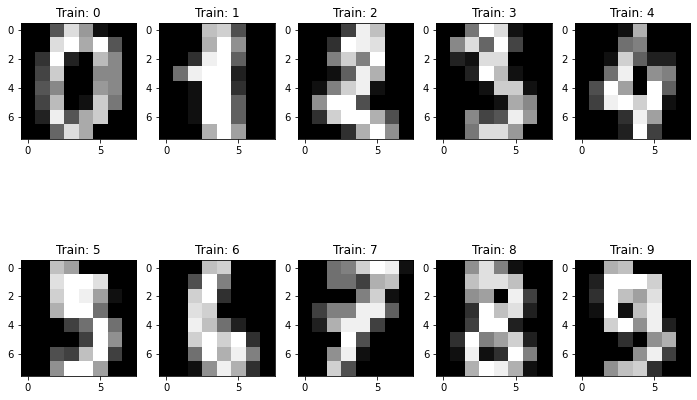

In [5]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.

plot_mnist_sample(digits)

### Problem 1.3: Recognizing hand-written digits with Sklearn [5 pts]

One of the most amazing things about the Sklearn library is that it provides an easy way to build and call different models. In this part, we will get experience with  `LogisticRegressionClassifier` and `kNNCalssifier`.

In [6]:
# DO NOT CHANGE
#### Some helper functions are given below####
def DataBatch(data, label, batchsize, shuffle=True):
    """
    This function provides a generator for batches of data that 
    yields data (batchsize, 3, 32, 32) and labels (batchsize)
    if shuffle, it will load batches in a random order
    """
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

def test(testData, testLabels, classifier):
    """
    Call this function to test the accuracy of a classifier
    """
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

In [7]:
# DO NOT CHANGE
# Split data into 90% train and 10% test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.images.reshape((len(digits.images), -1)), digits.target, test_size=0.1, shuffle=False)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

class RandomClassifier():
    """
    This is a sample classifier. 
    given an input it outputs a random class
    """
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])
    
class LogisticRegressionClassifier():
    def __init__(self, sol='liblinear'):
        """
        Initialize Logistic Regression model.
        
        Inputs:
        sol: Solver method that the Logistic Regression model would use for optimization
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model = LogisticRegression(solver=sol)
        
    def train(self, trainData, trainLabels):
        """
        Train your model with image data and corresponding labels.
        
        Inputs:
        trainData: Training images (N,64)
        trainLabels: Labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        
        self.model.fit(trainData, trainLabels)
        
        
    def __call__(self, x):
        """
        Predict the trained model on test data.

        Inputs:
        x: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        
        output = self.model.predict(x)
        return output
       
    
class kNNClassifier():
    def __init__(self, k=3, algorithm='brute'):
        """
        Initialize KNN model.
        
        Inputs:
        k: number of neighbors involved in voting
        algorithm: Algorithm used to compute nearest neighbors
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model = KNeighborsClassifier(n_neighbors=k, algorithm = algorithm)
        
        
    def train(self, trainData, trainLabels):
        """
        Train your model with image data and corresponding labels.
        
        Inputs:
        trainData: Training images (N,64)
        trainLabels: Labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model.fit(trainData, trainLabels)
       
        
    def __call__(self, x):
        """
        Predict the trained model on test data.

        Inputs:
        x: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        
        output = self.model.predict(x)
        return output
        

In [9]:
# TEST CODE: DO NOT CHANGE
randomClassifierX = RandomClassifier()
print ('Random classifier accuracy: %f'%test(X_test, y_test, randomClassifierX))

Random classifier accuracy: 8.333333


In [10]:
# TEST CODE: DO NOT CHANGE
# TEST LogisticRegressionClassifier

lrClassifierX = LogisticRegressionClassifier()
lrClassifierX.train(X_train, y_train)
print ('Logistic Regression Classifier classifier accuracy: %f'%test(X_test, y_test, lrClassifierX))

Logistic Regression Classifier classifier accuracy: 93.888889


In [11]:
# TEST kNNClassifier
""" ==========
YOUR CODE HERE
========== """

knnClassifierX = kNNClassifier()
knnClassifierX.train(X_train, y_train)
print ('kNN Classifier classifier accuracy: %f'%test(X_test, y_test, knnClassifierX))

kNN Classifier classifier accuracy: 96.666667


### Problem 1.4: Confusion Matrix [5 pts]

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Here you will implement a function that computes the confusion matrix for a classifier. The matrix (M) should be $n \times n$ where $n$ is the number of classes. Entry `M[i,j]` should contain the fraction of images of class `i` that was classified as class `j`. The following example shows the confusion matrix for the `RandomClassifier`. Your task is to plot the results for `LogisticRegressionClassifier` and `kNNClassifier`.
<!-- <img src="./fig/eg_confusion.PNG" alt="drawing" width="250"/> -->
![confusion](fig/eg_confusion.PNG) 

In [12]:
from tqdm import tqdm

def Confusion(testData, testLabels, classifier):
    batchsize=50
    correct=0
    M=np.zeros((10,10))
    num=testData.shape[0]/batchsize
    count=0
    acc=0
    
    for data,label in tqdm(DataBatch(testData,testLabels,batchsize,shuffle=False),total=len(testData)//batchsize):
        """ ==========
        YOUR CODE HERE
        ========== """
        predictions = classifier(data)
        
        for i in range(0, predictions.shape[0]):
            
            M[label[i]][predictions[i]] += 1
            
            if (label[i] == predictions[i]):
                acc += 1
        
        count = count + predictions.shape[0]
        
    for i in range(0, 10):

        M[i] = M[i]/np.sum(M[i])
    
    return M,acc*100.0/len(testData)

def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)
    plt.show()
    print(np.round(M,2))

4it [00:00, 1707.95it/s]             


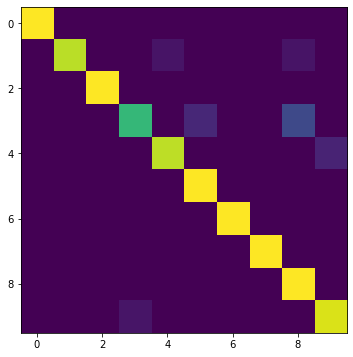

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.89 0.   0.   0.05 0.   0.   0.   0.05 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.67 0.   0.11 0.   0.   0.22 0.  ]
 [0.   0.   0.   0.   0.9  0.   0.   0.   0.   0.1 ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.94]]


In [13]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST LogisticRegressionClassifier

M,acc = Confusion(X_test, y_test, lrClassifierX)
VisualizeConfussion(M)

4it [00:00, 299.00it/s]              


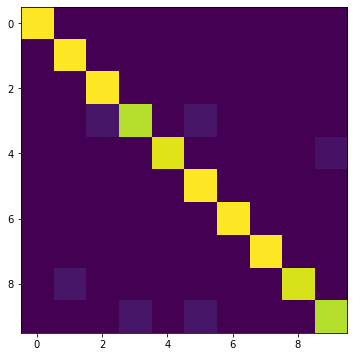

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.06 0.89 0.   0.06 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.   0.94 0.  ]
 [0.   0.   0.   0.06 0.   0.06 0.   0.   0.   0.89]]


In [14]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST kNNClassifier

M,acc = Confusion(X_test, y_test, knnClassifierX)
VisualizeConfussion(M)

### Problem 1.5: K-Nearest Neighbors (KNN) [7 pts]

For this problem, you will complete a simple kNN classifer without Sklearn. The distance metric is Euclidean distance (L2 norm) in pixel space. You may use the **np.linalg.norm** function to compute distance. $k$ refers to the number of neighbors involved in voting on the class. 

In [15]:
class kNNClassifierManual():
    def __init__(self, k=3):
        self.k=k
        self.X_train = None
        self.y_train = None

    def train(self, trainData, trainLabels):
        self.X_train = trainData
        self.y_train = trainLabels
        
    def __call__(self, X):
        """
        Predict the labels for the input data using KNN method.

        Inputs:
        X: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        
        N = X.shape[0]
        predictions = []
        
        for i in range(0, N):
            
            predictions.append(self.prediction_helper(X[i]))
            
        predictions = np.array(predictions) 
        
        return predictions
    
    def prediction_helper(self, x):
        
        # Calculate distance of this x from all training samples
        
        N_train_samples = self.X_train.shape[0]
        
        L2_distance_list = []
        
        for i in range(0, N_train_samples):
            
            L2_distance = np.linalg.norm((self.X_train[i] - x))
            L2_distance_list.append((L2_distance, self.y_train[i]))
        
        L2_distance_list.sort()
        
        ## Check the maximum frequency label among the top k labels
        
        freq_label = {}
        
        for i in range(0, self.k):
            prev_freq = freq_label.get(L2_distance_list[i][1], 0)
            freq_label[L2_distance_list[i][1]] = prev_freq + 1
            
        max_freq = -1
        max_freq_label = -1
                
        for i in range (0, self.k):
            label = L2_distance_list[i][1]
            if (freq_label[label]>max_freq):
                max_freq = freq_label[label]
                max_freq_label = label
        
        return max_freq_label
        

In [16]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST kNNClassifierManual

knnClassifierManualX = kNNClassifierManual()
knnClassifierManualX.train(X_train, y_train)
print ('KNN classifier accuracy: %f'%test(X_test, y_test, knnClassifierManualX))

KNN classifier accuracy: 96.111111


4it [00:01,  2.58it/s]                       


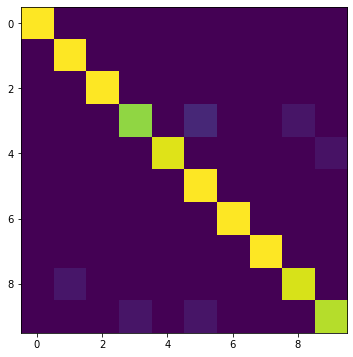

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.83 0.   0.11 0.   0.   0.06 0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.   0.94 0.  ]
 [0.   0.   0.   0.06 0.   0.06 0.   0.   0.   0.89]]


In [17]:

M,acc = Confusion(X_test, y_test, knnClassifierManualX)
VisualizeConfussion(M)

### Problem 1.6: Principal Component Analysis (PCA) K-Nearest Neighbors (KNN) [8 pts]
Here you will implement a simple KNN classifer in PCA space (for k=3 and 25 principal components).
You should implement PCA yourself using svd (you may not use sklearn.decomposition.PCA
or any other package that directly implements PCA transformations)

You may use your previous implementation of the KNN classifier in this part.

Is the testing time for PCA KNN classifier more or less than that for KNN classifier? Comment on why it differs if it does.

In [18]:
class PCAKNNClassifer():
    def __init__(self, components=25, k=3):
        """
        Initialize PCA kNN classifier

        Inputs:
        components: number of principal components
        k: number of neighbors involved in voting
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.components = components
        self.knnClassifier = kNNClassifierManual(k)
        self.training_mean = None
        self.V = None
        
    def train(self, trainData, trainLabels):
        """
        Train your model with image data and corresponding labels.
        
        Inputs:
        trainData: Training images (N,64)
        trainLabels: Labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
    
        data = np.copy(trainData)
        # Number of observations
        m = data.shape[0]
        # Number of dimensions
        n = data.shape[1]
        # Calculate mean from the data
        mean = np.mean(data, axis = 0)
        # Subtract mean form the data
        data = data - mean
        # Covariance matrix
        cov = (1/(m-1))*(np.matmul(np.transpose(data), data))
        # perform singular value decomposition
        u, sigma, v_t = np.linalg.svd(data, full_matrices=True)
        V = np.transpose(v_t)
        V = V[:, :self.components]
        data = np.matmul(data, V)
        
        self.V = V
        self.training_mean = mean
        
        self.knnClassifier.train(data, trainLabels)
        
        
    def __call__(self, x):
        """
        Predict the trained model on test data.

        Inputs:
        x: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        
        X = np.copy(x)
        X = X - self.training_mean
        # Project into reduced dimention
        X = np.matmul(X, self.V)
        predictions = self.knnClassifier(X)
        return predictions
       
# test your classifier with only the first 100 training examples (use this
# while debugging)
pcaknnClassiferX = PCAKNNClassifer()
pcaknnClassiferX.train(X_train[:100], y_train[:100])
print ('PCA KNN classifier accuracy: %f'%test(X_test, y_test, pcaknnClassiferX))

PCA KNN classifier accuracy: 84.444444


4it [00:01,  2.61it/s]                       

PCA KNN classifier accuracy: 96.666667


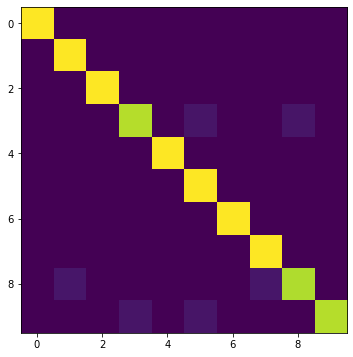

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.89 0.   0.06 0.   0.   0.06 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.06 0.88 0.  ]
 [0.   0.   0.   0.06 0.   0.06 0.   0.   0.   0.89]]


In [19]:
# test your classifier with all the training examples
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(X_train, y_train)
# display confusion matrix for your PCA KNN classifier with all the training examples
""" ==========
YOUR CODE HERE
========== """

M_pca, acc_pca = Confusion(X_test, y_test, pcaknnClassifer)

print ('PCA KNN classifier accuracy: %f'%acc_pca)
VisualizeConfussion(M_pca)

**Comments**

The testing for PCA-KNN classifier is 00:01s for 4 iterations at the speed of 2.61 it/s whereas testing time for KNN is 00:01s for 4 iterations at 2.58/s. **Hence testing time for PCA-KNN is less than KNN (since the speed it/s is more for PCA-KNN)**. This is because in PCA-KNN model, when searching for nearest neighbours it has to do so in reduced dimensional space (25) whereas in KNN it has to search for nearest neighbours in 64 dimesional space. Searching in lower dimensional space means less computation and hence less time. Hence PCA-KNN takes less time while testing.

## Problem 2: Deep learning [28 pts]


### Problem 2.1 Initial setup [1 pts]

Follow the directions on https://pytorch.org/get-started/locally/ to install Pytorch on your computer. 

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version. TA's will not provide any support related to GPU or CUDA.

Run the torch import statements below to verify your instalation.



In [20]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable

x = torch.rand(5, 3)
print(x)

tensor([[0.8639, 0.4235, 0.9270],
        [0.6404, 0.4193, 0.9968],
        [0.5493, 0.9878, 0.2428],
        [0.9341, 0.0443, 0.7900],
        [0.5440, 0.9849, 0.4609]])


In this problem, we will use the full dataset of MNIST database with 28x28 pixel images of digits.

Download the MNIST data from http://yann.lecun.com/exdb/mnist/.

Download the 4 zipped files, extract them into one folder, and change the variable 'path' in the code below. (Code taken from https://gist.github.com/akesling/5358964 )

Plot one random example image corresponding to each label from training data.

In [21]:
import os
import struct

# Change path as required
path = os.getcwd()+"/mnist/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
X_train=np.array(list(read('training','images')))
y_train=np.array(list(read('training','labels')))
X_test=np.array(list(read('testing','images')))
y_test=np.array(list(read('testing','labels')))

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-21-c7d3783ae392>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if dataset is "training":
<ipython-input-21-c7d3783ae392>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif dataset is "testing":


In [22]:
def plot_mnist_sample_high_res(X_train, y_train):
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.
    
    """
    plt.figure()
    
    """ ==========
    YOUR CODE HERE
    ========== """
    
    # Dictionary to get index of image of each digit type
    imageIndex = {}
    
    N = X_train.shape[0]
    
    for i in range(0, N):
        
        if y_train[i] not in imageIndex.keys():
            imageIndex[y_train[i]] = i
            
        if (len(imageIndex.keys()) == 10):
            break
            
    plt.rcParams["figure.figsize"] = (12,8)
    figure, ax = plt.subplots(2, 5)
    
    for i in range(0, 10):
        
        first_index = (int)(i/5)
        second_index = (i%5)
        
        ax[first_index, second_index].imshow(X_train[imageIndex[i]], cmap='gray')
        label = 'Train: '+ str(i)
        ax[first_index, second_index].set_title(label)


<Figure size 864x576 with 0 Axes>

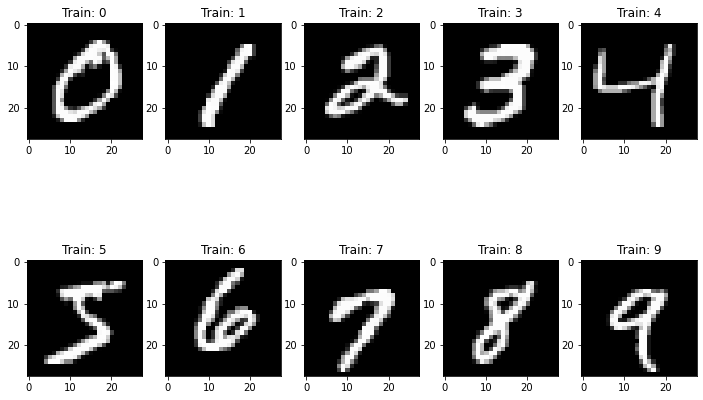

In [23]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.

plot_mnist_sample_high_res(X_train, y_train)

### Problem 2.2:  Training with PyTorch [8 pts]
Below is some helper code to train your deep networks. 
Complete the train function for DNN below. 

You should write down the training operations in this function. That means, for a batch of data you have to initialize the gradients, forward propagate the data, compute error, do back propagation and finally update the parameters. You would have to choose an appropriate loss function and optimizer from PyTorch for this problem.

This function will be used in the following questions with different networks.
You can look at https://pytorch.org/tutorials/beginner/pytorch_with_examples.html for reference.



In [24]:
# base class for your deep neural networks. It implements the training loop (train_net).


import torch.nn.init
import torch.optim as optim
from torch.autograd import Variable
from torch.nn.parameter import Parameter
from tqdm import tqdm
from scipy.stats import truncnorm

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        pass
    
    def forward(self, x):
        raise NotImplementedError
    
    def train_net(self, X_train, y_train, epochs=1, batchSize=50):
        """ ==========
        YOUR CODE HERE
        ========== """
        
        X_tensor = torch.from_numpy(X_train)
        y_tensor = torch.from_numpy(y_train)
        
        N = X_train.shape[0]
        number_of_batches = (int)(N/batchSize)
        loss = nn.CrossEntropyLoss()
        
        if (N%batchSize != 0):
            number_of_batches += 1
            
        opt = optim.SGD(self.parameters(), lr=0.01, momentum=0.9)
        
        for i in range(0, epochs):
            
            for j in range(0, number_of_batches):
                
                opt.zero_grad()
                
                X_batch = X_tensor[j*batchSize:min((j+1)*batchSize, N)]
                y_batch = (y_tensor[j*batchSize:min((j+1)*batchSize, N)]).long()
                
                y_pred = self.forward(X_batch)
                output = loss(y_pred, y_batch)
                output.backward()
                
                opt.step()
    
    def __call__(self, x):
        inputs = Variable(torch.FloatTensor(x))
        prediction = self.forward(inputs)
        return np.argmax(prediction.data.cpu().numpy(), 1)

# helper function to get weight variable
def weight_variable(shape):
    initial = torch.Tensor(truncnorm.rvs(-1/0.01, 1/0.01, scale=0.01, size=shape))
    return Parameter(initial, requires_grad=True)

# helper function to get bias variable
def bias_variable(shape):
    initial = torch.Tensor(np.ones(shape)*0.1)
    return Parameter(initial, requires_grad=True)

In [25]:
# example linear classifier - input connected to output
# you can take this as an example to learn how to extend DNN class
class LinearClassifier(DNN):
    def __init__(self, in_features=28*28, classes=10):
        super(LinearClassifier, self).__init__()
        # in_features=28*28
        self.weight1 = weight_variable((classes, in_features))
        self.bias1 = bias_variable((classes))
    
    def forward(self, x):
        # linear operation
        y_pred = torch.addmm(self.bias1, x.view(list(x.size())[0], -1), self.weight1.t())
        return y_pred


X_train=np.float32(np.expand_dims(X_train,-1))/255
X_train=X_train.transpose((0,3,1,2))

X_test=np.float32(np.expand_dims(X_test,-1))/255
X_test=X_test.transpose((0,3,1,2))

In [26]:
# test the example linear classifier (note you should get around 90% accuracy
# for 10 epochs and batchsize 50)
linearClassifier = LinearClassifier()
linearClassifier.train_net(X_train, y_train, epochs=10)

print(X_train.shape)
print(y_train.shape)

print ('Linear classifier accuracy: %f'%test(X_test, y_test, linearClassifier))

(60000, 1, 28, 28)
(60000,)
Linear classifier accuracy: 92.090000


100%|██████████| 200/200 [00:00<00:00, 2763.73it/s]


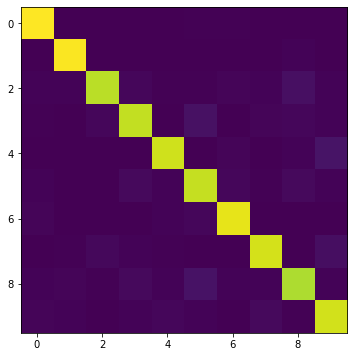

[[0.98 0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.01 0.88 0.02 0.01 0.   0.01 0.01 0.04 0.01]
 [0.   0.   0.02 0.9  0.   0.04 0.   0.01 0.02 0.01]
 [0.   0.   0.   0.   0.91 0.   0.01 0.   0.01 0.05]
 [0.01 0.   0.   0.02 0.01 0.9  0.02 0.01 0.02 0.01]
 [0.01 0.   0.   0.   0.01 0.02 0.95 0.   0.   0.  ]
 [0.   0.01 0.02 0.01 0.01 0.   0.   0.92 0.   0.04]
 [0.01 0.01 0.01 0.02 0.01 0.05 0.01 0.01 0.86 0.01]
 [0.01 0.01 0.   0.01 0.02 0.01 0.   0.02 0.   0.92]]


In [27]:
# display confusion matrix
""" ==========
YOUR CODE HERE
========== """

M_linearCalssifier, acc_linearClassifier = Confusion(X_test, y_test, linearClassifier)
VisualizeConfussion(M_linearCalssifier)

### Problem 2.3:  Visualizing Weights (Single Layer Perceptron) [3 pts]
The simple linear classifier implemented in the cell already performs quite well. Plot the filter weights corresponding to each output class (weights, not biases) as images. (Normalize weights to lie between 0 and 1 and use color maps like 'inferno' or 'plasma' for good results). Comment on what the weights look like and why that may be so.


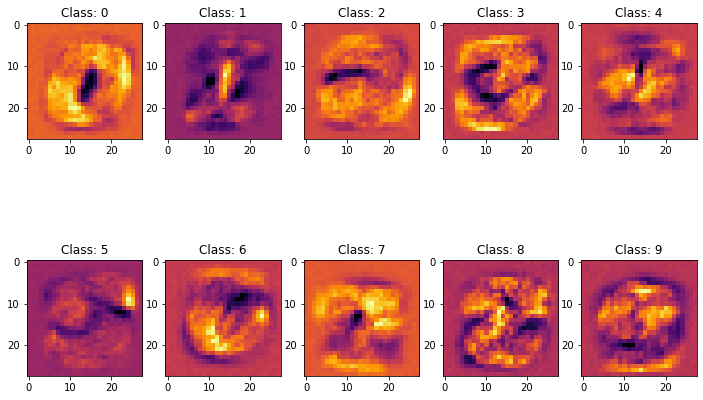

In [28]:
# Plot filter weights corresponding to each class, you may have to reshape them to make sense out of them
# linearClassifier.weight1.data will give you the first layer weights
""" ==========
YOUR CODE HERE
========== """

weights = (linearClassifier.weight1.data).numpy()
weights = (weights-weights.min())/(weights.max()-weights.min())

plt.rcParams["figure.figsize"] = (12,8)
figure, ax = plt.subplots(2, 5)

for i in range(0, 10):
    
    first_index = (int)(i/5)
    second_index = (i%5)

    ax[first_index, second_index].imshow(np.reshape(weights[i], (28, 28)), cmap='inferno')
    label = 'Class: '+ str(i)
    ax[first_index, second_index].set_title(label)


#### Comments on weights

Weights look like the class they correspond to. If you see visualization of weights corresponding to class 0, it looks like zero. Similar thing can be said about other classes as well. This is because if the weight mutiplied with the input leads to high value, that means input features are more similar to the weight, and hence corresponding output of that class is high.

### Problem 2.4: Multi Layer Perceptron (MLP) [8 pts]
Here you will implement an MLP. The MLP should consist of 2 layers (weight multiplication and bias offset) that map to the following feature dimensions:

* 28x28 -> hidden (50)
* hidden (50) -> classes

* The hidden layer should be followed with a ReLU nonlinearity. The final layer should not have a nonlinearity applied as we desire the raw logits output.
* The final output of the computation graph should be stored in self.y as that will be used in the training.

Display the confusion matrix and accuracy after training. Note: You should get ~ 95 % accuracy for 10 epochs and batch size 50.

Plot the filter weights corresponding to the mapping from the inputs to the first 10 hidden layer outputs (out of 50). Do the weights look similar to the weights plotted in the previous problem? Why or why not?

It is expected that the training model would take a few minutes to run.

In [29]:
class MLPClassifer(DNN):
    def __init__(self, in_features=28*28, classes=10, hidden=50):
        """
        Initialize weight and bias variables
        """
        super(MLPClassifer, self).__init__()
        """ ==========
        YOUR CODE HERE
        ========== """
        self.weight1 = weight_variable((hidden, in_features))
        self.bias1 = bias_variable((hidden))
        self.weight2 = weight_variable((classes, hidden))
        self.bias2 = bias_variable((classes))
    
    def forward(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        hidden_layer = nn.functional.relu(torch.addmm(self.bias1, x.view(list(x.size())[0], -1), self.weight1.t()))
        output = torch.addmm(self.bias2, hidden_layer, self.weight2.t())
        return output
        
mlpClassifer = MLPClassifer()
mlpClassifer.train_net(X_train, y_train, epochs=10, batchSize=50)

100%|██████████| 200/200 [00:00<00:00, 3159.65it/s]

MLP classifier accuracy: 96.950000


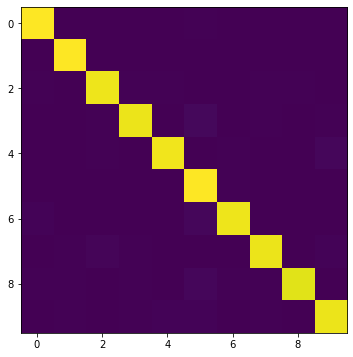

[[0.99 0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.97 0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.96 0.   0.02 0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.97 0.   0.01 0.   0.   0.02]
 [0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.02 0.96 0.   0.   0.  ]
 [0.   0.01 0.01 0.   0.   0.   0.   0.96 0.   0.01]
 [0.01 0.   0.   0.01 0.   0.02 0.   0.01 0.95 0.  ]
 [0.   0.   0.   0.01 0.01 0.01 0.   0.01 0.   0.96]]


In [30]:
# Plot confusion matrix
M_mlp,acc_mlp = Confusion(X_test, y_test, mlpClassifer)
print ('MLP classifier accuracy: %f'%acc_mlp)
VisualizeConfussion(M_mlp)

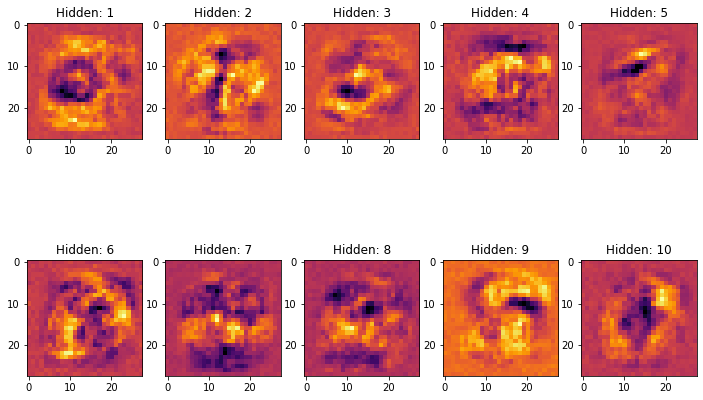

In [31]:
# Plot filter weights
""" ==========
YOUR CODE HERE
========== """
weights = (mlpClassifer.weight1.data).numpy()
weights = (weights-weights.min())/(weights.max()-weights.min())

plt.rcParams["figure.figsize"] = (12,8)
figure, ax = plt.subplots(2, 5)

for i in range(0, 10):
    
    first_index = (int)(i/5)
    second_index = (i%5)

    ax[first_index, second_index].imshow(np.reshape(weights[i], (28, 28)), cmap='inferno')
    label = 'Hidden: '+ str(i+1)
    ax[first_index, second_index].set_title(label)


### Comments

The weights do not look same as obtained in previous. This is because, here the hidden unit is trying to detect a particular edge or pattern instead of the whole digit (which was the case earlier). All 10 visualizations are different, and represent some pattern that particular hidden unit is trying to detect.

### Problem 2.5: Convolutional Neural Network (CNN) [8 pts]
Here you will implement a CNN with the following architecture:

* n=10
* ReLU( Conv(kernel_size=5x5, stride=2, output_features=n) )
* ReLU( Conv(kernel_size=5x5, stride=2, output_features=n*2) )
* ReLU( Linear(hidden units = 64) )
* Linear(output_features=classes)

So, 2 convolutional layers, followed by 1 fully connected hidden layer and then the output layer

Display the confusion matrix and accuracy after training. You should get around ~ 98 % accuracy for 10 epochs and batch size 50.<br><br>
**Note: You are not allowed to use torch.nn.Conv2d() and torch.nn.Linear(), Using these will lead to deduction of points. Use the declared conv2d(), weight_variable() and bias_variable() functions.** Although, in practice, when you move forward after this class you will use torch.nn.Conv2d() which makes life easier and hides all the operations underneath.

In [32]:
def conv2d(x, W, stride, bias=None):
    # x: input
    # W: weights (out, in, kH, kW)
    return F.conv2d(x, W, bias, stride=stride, padding=2)

# Defining a Convolutional Neural Network
class CNNClassifer(DNN):
    def __init__(self, classes=10, n=5):
        super(CNNClassifer, self).__init__()
        """ ==========
        YOUR CODE HERE
        ========== """
        self.hidden = 64
        self.stride = 2
        self.n = n
        self.weight1 = weight_variable((self.n, 1, 5, 5))
        self.bias1 = bias_variable((self.n))
        self.weight2 = weight_variable((2*self.n, self.n, 5, 5))
        self.bias2 = bias_variable((2*self.n))
        self.weight3 = weight_variable((64, 7*7*(self.n)*2))
        self.bias3 = bias_variable((64))
        self.weight4 = weight_variable((classes, 64))
        self.bias4 = bias_variable((classes))
       
    def forward(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        output1 = nn.functional.relu(conv2d(x, self.weight1, self.stride, self.bias1))
        output2 = nn.functional.relu(conv2d(output1, self.weight2, self.stride, self.bias2))
        output2 = torch.flatten(output2, start_dim = 1)
        output3 = nn.functional.relu(torch.addmm(self.bias3, output2, self.weight3.t()))
        y = torch.addmm(self.bias4, output3, self.weight4.t())
        return y
    
cnnClassifer = CNNClassifer(n = 10)
cnnClassifer.train_net(X_train, y_train, epochs=10, batchSize=50)

100%|██████████| 200/200 [00:00<00:00, 548.31it/s]


CNN classifier accuracy: 98.470000


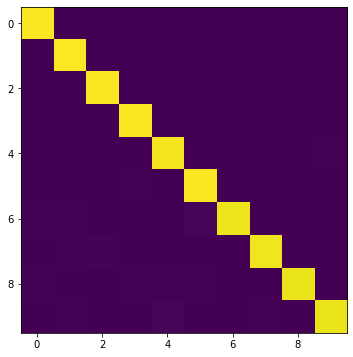

[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.01]
 [0.   0.   0.   0.01 0.   0.99 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.01 0.97 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   0.   0.98 0.   0.  ]
 [0.01 0.   0.   0.01 0.   0.01 0.   0.   0.97 0.  ]
 [0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.97]]


In [33]:
# Plot confusion matrix and print the test accuracy of the classifier
""" ==========
YOUR CODE HERE
========== """

M_cnn,acc_cnn = Confusion(X_test, y_test, cnnClassifer)
print ('CNN classifier accuracy: %f'%acc_cnn)
VisualizeConfussion(M_cnn)

* Note that the MLP/ConvNet approaches lead to an accuracy a little higher than the K-NN approach. 
* In general, Neural net approaches lead to significant increase in accuracy, but in this case since the problem is not too hard, the increase in accuracy is not very high.
* However, this is still quite significant considering the fact that the ConvNets we've used are relatively simple while the accuracy achieved using K-NN is with a search over 60,000 training images for every test image.
* You can look at the performance of various machine learning methods on this problem at http://yann.lecun.com/exdb/mnist/
* You can learn more about neural nets/ pytorch at<br> https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* You can play with a demo of neural network created by Daniel Smilkov and Shan Carter at https://playground.tensorflow.org/